In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [6]:
def choose_statistic(x, sample_stat_text):
  # calculate mean if the text is "Mean"
  if sample_stat_text == "Mean":
    return np.mean(x)
  # calculate minimum if the text is "Minimum"
  elif sample_stat_text == "Minimum":
    return np.min(x)
  # calculate variance if the text is "Variance"
  elif sample_stat_text == "Variance":
    return np.var(x, ddof=1)
  # Adding this ddof=1 parameter will divide our input by n-1 instead of n, therefore applying the sample variance formula.
    
  # if you want to add an extra stat

  # raise error if sample_stat_text is not "Mean", "Minimum", or "Variance"
  else:
    raise Exception('Make sure to input "Mean", "Minimum", or "Variance"')

def population_distribution(population_data):
  # plot the population distribution
  sns.histplot(population_data, stat='density')
  # informative title for the distribution 
  plt.title(f"Population Distribution")
  # remove None label
  plt.xlabel('')
  plt.show()
  plt.clf()

def sampling_distribution(population_data, samp_size, stat):
  # list that will hold all the sample statistics
  sample_stats = []
  for i in range(500):
    # get a random sample from the population of size samp_size
    samp = np.random.choice(population_data, samp_size, replace = False)
    # calculate the chosen statistic (mean, minimum, or variance) of the sample
    sample_stat = choose_statistic(samp, stat)
    # add sample_stat to the sample_stats list
    sample_stats.append(sample_stat)
  
  pop_statistic = round(choose_statistic(population_data, stat),2)
  # plot the sampling distribution
  sns.histplot(sample_stats, stat='density')
  # informative title for the sampling distribution
  plt.title(f"Sampling Distribution of the {stat} \nMean of the Sample {stat}s: {round(np.mean(sample_stats), 2)} \n Population {stat}: {pop_statistic}")
  plt.axvline(pop_statistic,color='g',linestyle='dashed', label=f'Population {stat}')
  # plot the mean of the chosen sample statistic for the sampling distribution
  plt.axvline(np.mean(sample_stats),color='orange',linestyle='dashed', label=f'Mean of the Sample {stat}s')
  plt.legend()
  plt.show()
  plt.clf()

### 1
You will be working with a dataset called spotify_data.csv. In script.py, use the read_csv() pandas function to load in spotify_data.csv into a variable called `spotify_data`.

In [7]:
spotify_data = pd.read_csv('spotify_data.csv')

### 2
Use the pandas .head() function to preview the spotify_data. If you need a reminder of how to use this function, click the hint below.

In [8]:
spotify_data.head()

,tempo,danceability,energy,instrumentalness,liveness,valence
0,156.985,0.831,0.814,0.013400,0.0556,0.3890
1,115.080,0.719,0.493,0.000000,0.1180,0.1240
2,218.050,0.850,0.893,0.000004,0.3720,0.0391
3,186.948,0.476,0.781,0.000000,0.1140,0.1750
4,147.988,0.798,0.624,0.000000,0.1660,0.5910


### 3

For this project, we are going to focus on the tempo variable. This column gives the beats per minute (bpm) of each song in spotify.csv. The other columns in our dataset are:

- danceability
- energy
- instrumentalness
- liveness
- valences
For now, we are going to ignore these other columns.

Create a variable called `song_tempos` that contains the tempo column data.

### 4

There are three resdy to go functions: 
- choose_statistic()
- population_distribution()
- sampling_distribution() 


`choose_statistic()` allows us to choose a statistic we want to calculate for our sampling and population distributions. It contains two parameters:
- `x`: An array of numbers
- `sample_stat_text`: A string that tells the function which statistic to calculate on x. It takes on three values: “Mean”, “Minimum”, or “Variance”.

`population_distribution()` allows us to plot the population distribution of a dataframe with one function call. It takes the following parameter:

`population_data`: the dataframe being passed into the function</br>
</br>
`sampling_distribution()` allows us to plot a simulated sampling distribution of a statistic. The simulated sampling distribution is created by taking random samples of some size, calculating a particular statistic, and plotting a histogram of those sample statistics. It contains three parameters:

- `population_data`: the dataframe being sampled from
- `samp_size`: the size of each sample
- `stat`: the specific statistic being measured for each sample — either “Mean”, “Minimum”, or “Variance”

## Sampling Distribution Exploration
### 5
To start off, let’s use the `population_distribution()` function to graph distribution of `tempo`.

When you click run, you should see a graph with the following title:
Population Distribution</br>
How would you describe this distribution?

42305


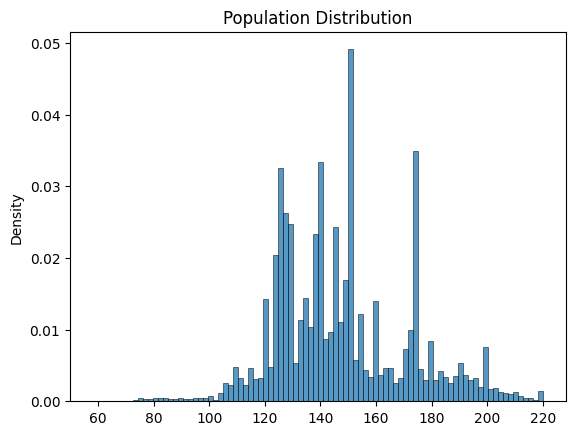

<Figure size 640x480 with 0 Axes>

In [9]:
print(len(spotify_data.tempo))
population_distribution(spotify_data.tempo)

### 6

Now let’s plot the sampling distribution of the sample mean with sample sizes of 30 songs. To do this, use the `sampling_distribution()`.

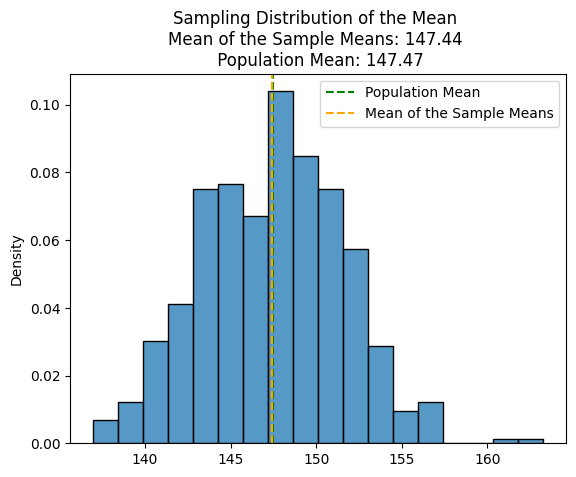

<Figure size 640x480 with 0 Axes>

In [10]:
sampling_distribution(spotify_data.tempo, 30, 'Mean')

Compare your sampling distribution of the sample means to the population mean. 
Is the sample mean an unbiased or biased estimator of the population?

It's an unbiased estimator.

### 8 
Now let’s plot the sampling distribution of the sample minimum with sample sizes of 30 songs. To do this, use the sampling_distribution() helper function.

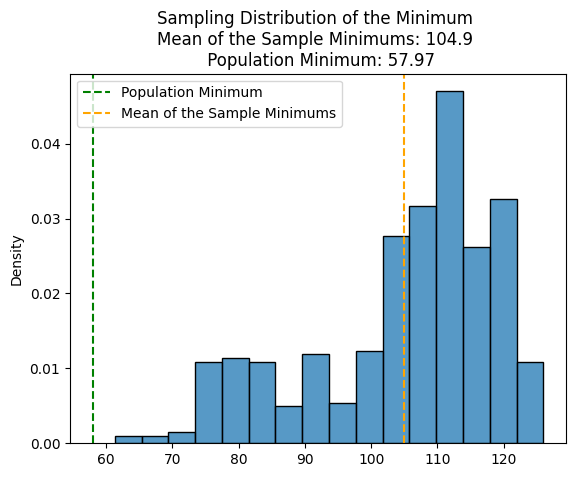

<Figure size 640x480 with 0 Axes>

In [11]:
sampling_distribution(spotify_data.tempo, 30, 'Minimum')

Compare your sampling distribution of the sample minimums to the population minimum. Is the sample minimum an unbiased or biased estimator of the population?

Max and Min are always biased estimators.

### 10 

Now let’s plot the sampling distribution of the sample variance with sample sizes of 30 songs. To do this, use the sampling_distribution() helper function.

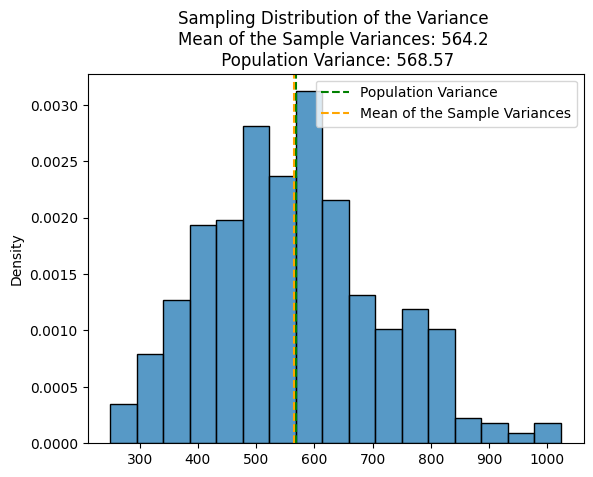

<Figure size 640x480 with 0 Axes>

In [12]:
sampling_distribution(spotify_data.tempo, 30, 'Variance')

Compare your sampling distribution of the sample variance to the population variance. Does the sample variance appear to be an unbiased or biased estimator of the population?

The mean of the sample variances is consistently slightly less than the population variance, meaning it is a biased estimator. However, it is super close. Let’s dig into this.

We calculated the sample variance the same way we calculate population variance..

However, the formulas for sample variance and population variance are actually distinct. As we have seen, population variance is calculated as:

<i>population variance</i> = [Sommatoria(Observation - u)^2]/n

When we measure the sample variance using the same formula, it turns out that we tend to underestimate the population variance. Because of this, we divide by n-1 instead of n:

<i>sample variance</i> = [Sommatoria(Observation - sample mean)^2]/n

Using this formula, sample variance becomes an unbiased estimator of the population variance.

## Calculating Probabilities
### 13
We have a good sense of some sample statistics now that we’ve investigated sampling distributions. Let’s take our analysis further by calculating probabilities.

First, calculate the population mean and population standard deviation of `song_tempos`. Save these values in two separate variables called `population_mean` and `population_std`

In [16]:
population_mean = np.mean(spotify_data.tempo)
population_mean

147.4740559035575

In [18]:
population_std = np.std(spotify_data.tempo)
population_std

23.84434149567985

### 14

Use `population_mean` and `population_std` to calculate the standard error of the sampling distribution of the sample mean with a sample size of 30.

Save this value in a variable called `standard_error`.

The formula for the standard error of the sample mean is: <i>standard deviation/square root of sample size</i>

In [21]:
sample_size = 30
standard_error = population_std/sample_size**0.5
standard_error

4.3533612353467745

## 15

You are afraid that if the average tempo of the songs you randomly select is less than 140bpm that your party will not be enjoyable.

Using `population_mean` and `standard_error` in a CDF, calculate the probability that the sample mean of 30 selected songs is less than 140bpm.

Remember to print your result into the output terminal.

In [23]:
stats.norm.cdf(139, population_mean, standard_error)

0.02579407021823884

## 16
You know the party will be truly epic if the randomly sampled songs have an average tempo of greater than 150bpm.

Using `population_mean` and `standard_error` in a CDF, calculate the probability that the sample mean of 30 selected songs is GREATER than 150bpm.

Remember to print your result into the output terminal.

Does this probability make you feel confident about the party?

In [26]:
1 - stats.norm.cdf(150, population_mean, standard_error)

0.2808802810182194

## 17
Awesome job! You are ready to throw an awesome party! If you want to do some more exploration of sampling distributions, here are some more opportunities:

Add another sample statistic to the choose_statistic() function in helper_functions.py — such as median, mode, or maximum.
Explore a different column of data from the spotify_data.csv dataset.
Use the sampling distribution of the sample minimum to estimate the probability of observing a specific sample minimum. For example, from the plot, what is the chance of getting a sample minimum that is less than 130bpm?